In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [66]:
from pandas_profiling import ProfileReport

In [67]:
url="C:/Users/shivangi shukla/Desktop/ml project/ml-project-zip/Datasets/taxi_city_ride/uio_clean.csv"

In [68]:
df=pd.read_csv(url,parse_dates=['pickup_datetime','dropoff_datetime'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,N,2025,24228,346
1,2,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,N,1390,16680,456
2,3,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,N,130317,1987,290
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,N,1933,25146,302
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,N,948,4625,314


In [69]:
#profile=ProfileReport(df,title='qio',minimal=True)
#profile

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  32366 non-null  int64         
 1   vendor_id           32366 non-null  object        
 2   pickup_datetime     32366 non-null  datetime64[ns]
 3   dropoff_datetime    32366 non-null  datetime64[ns]
 4   pickup_longitude    32366 non-null  float64       
 5   pickup_latitude     32366 non-null  float64       
 6   dropoff_longitude   32366 non-null  float64       
 7   dropoff_latitude    32366 non-null  float64       
 8   store_and_fwd_flag  32366 non-null  object        
 9   trip_duration       32366 non-null  int64         
 10  dist_meters         32366 non-null  int64         
 11  wait_sec            32366 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 3.0+ MB


In [71]:
df.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,32366.000000,32366.000000,32366.000000,32366.000000,32366.000000,3.236600e+04,3.236600e+04,3.236600e+04
mean,16183.500000,-78.492371,-0.189042,-78.492901,-0.191341,4.138239e+04,7.302745e+04,2.204058e+07
std,9343.403743,0.043108,0.076153,0.044783,0.085623,5.842226e+05,1.193671e+07,7.311736e+08
min,1.000000,-80.681697,-3.454279,-80.681721,-3.574739,-3.887110e+05,1.100000e+01,0.000000e+00
25%,8092.250000,-78.505867,-0.218344,-78.505734,-0.220508,5.000000e+02,2.148000e+03,1.070000e+02
50%,16183.500000,-78.490135,-0.181979,-78.490073,-0.185721,8.970000e+02,4.124000e+03,2.430000e+02
75%,24274.750000,-78.475783,-0.148715,-78.477443,-0.149867,1.710000e+03,7.475000e+03,4.990000e+02
max,32366.000000,-78.009669,0.866441,-77.710158,0.866759,7.002605e+07,2.147484e+09,9.516306e+10


In [72]:
df.drop(['store_and_fwd_flag'],axis=1,inplace=True)

In [73]:
df.shape

(32366, 11)

In [74]:
df.isna().sum()

id                   0
vendor_id            0
pickup_datetime      0
dropoff_datetime     0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
dist_meters          0
wait_sec             0
dtype: int64

In [75]:
import datetime

def wait(sec):
    return str(datetime.timedelta(seconds=sec))

a=wait(2400)
b=wait(70026052)
c=wait(-388711)
print(a)
print(b)
print(c)


0:40:00
810 days, 11:40:52
-5 days, 12:01:29


In [76]:
df['trip_duration'].min()

-388711

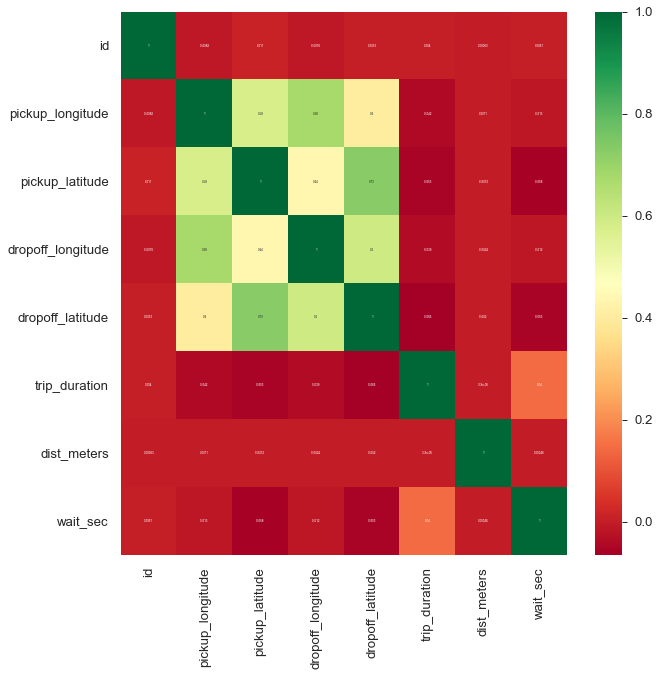

In [77]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

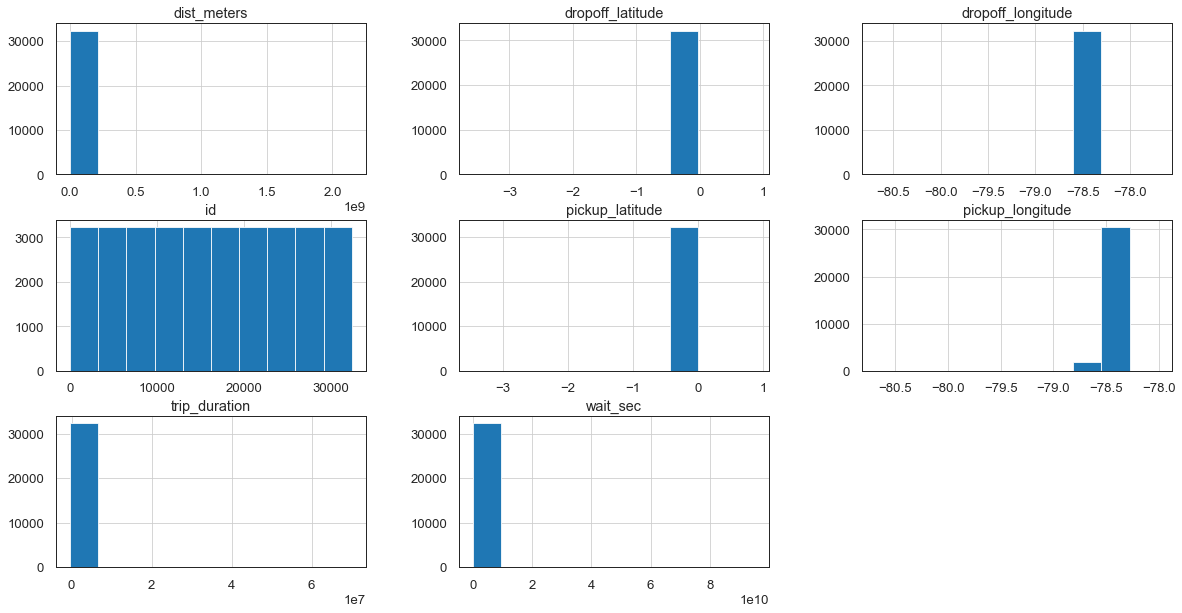

In [78]:
df.hist(figsize=(20,10))
plt.show()

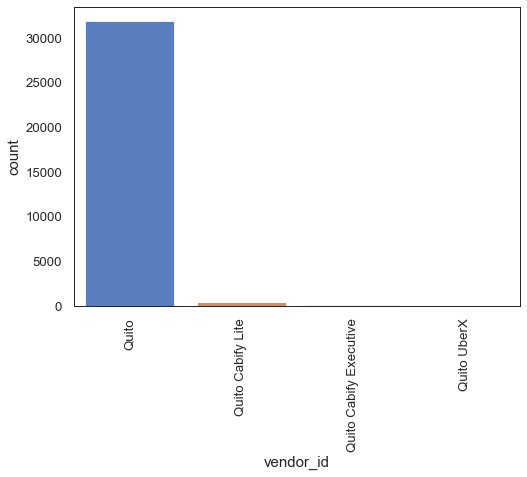

In [79]:
sns.set_context('paper',font_scale=1.5,rc={'font.size':3,'axes.labelsize':15})
sns.countplot(x='vendor_id',data=df,palette='muted')
plt.xticks(rotation=90)
plt.show()

In [80]:
df['vendor_id'].value_counts()

Quito                     31875
Quito Cabify Lite           400
Quito Cabify Executive       88
Quito UberX                   3
Name: vendor_id, dtype: int64

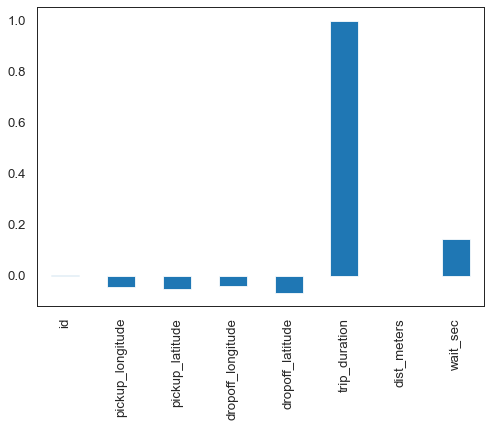

In [81]:
df.corrwith(df['trip_duration']).plot(kind='bar')
plt.show()

In [82]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,-78.503922,-0.232824,-78.549447,-0.361363,2025,24228,346
1,2,Quito,2016-09-18 04:03:20,2016-09-18 04:26:30,-78.440306,0.006789,-78.490786,-0.104836,1390,16680,456
2,3,Quito,2016-09-16 06:29:36,2016-09-18 06:41:33,-78.469551,-0.143636,-78.470277,-0.131083,130317,1987,290
3,4,Quito,2016-09-18 05:57:47,2016-09-18 06:30:00,-78.558076,-0.278241,-78.430220,-0.201934,1933,25146,302
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314


In [83]:
df['dropoff_datetime'].idxmax()

11119

In [84]:
#df['pickup_datetime']=df['pickup_datetime'].apply(lambda x: x.toordinal())
#df['dropoff_datetime']=df['dropoff_datetime'].apply(lambda x: x.toordinal())

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32366 entries, 0 to 32365
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 32366 non-null  int64         
 1   vendor_id          32366 non-null  object        
 2   pickup_datetime    32366 non-null  datetime64[ns]
 3   dropoff_datetime   32366 non-null  datetime64[ns]
 4   pickup_longitude   32366 non-null  float64       
 5   pickup_latitude    32366 non-null  float64       
 6   dropoff_longitude  32366 non-null  float64       
 7   dropoff_latitude   32366 non-null  float64       
 8   trip_duration      32366 non-null  int64         
 9   dist_meters        32366 non-null  int64         
 10  wait_sec           32366 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 2.7+ MB


In [86]:
df['hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month
df['year']=df['pickup_datetime'].dt.year
df['day']=df['pickup_datetime'].dt.day

In [87]:
df['year'].unique()

array([2016, 2017, 2014], dtype=int64)

Text(0.5, 1.0, 'rides per month')

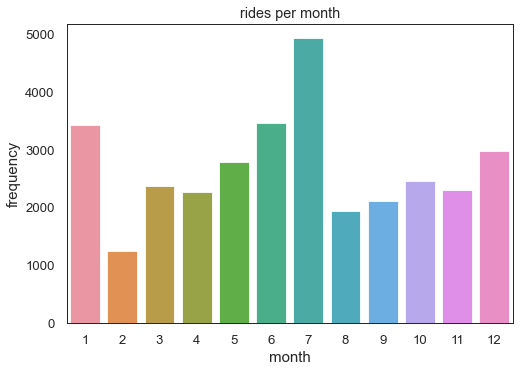

In [88]:
d=df['month'].value_counts()
sns.barplot(d.index,d.values)
plt.xlabel('month')
plt.ylabel('frequency')
plt.title('rides per month')

Text(0.5, 1.0, 'yearly rides')

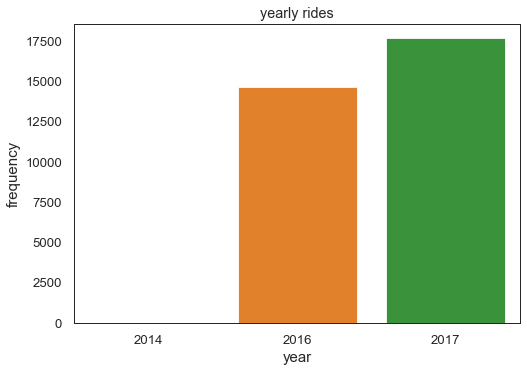

In [89]:
sns.countplot(x='year',data=df)
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('yearly rides')

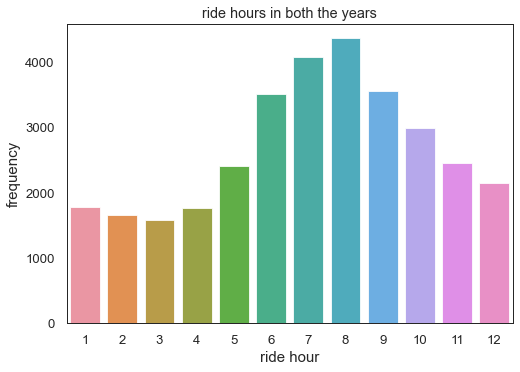

In [90]:
sns.countplot(x='hour',data=df)
plt.xlabel('ride hour')
plt.ylabel('frequency')
plt.title('ride hours in both the years')
plt.show()

In [91]:
uio=df[df['vendor_id']=='Quito']
uio_cl=df[df['vendor_id']=='Quito Cabify Lite']
uio_ce=df[df['vendor_id']=='Quito Cabify Executive']

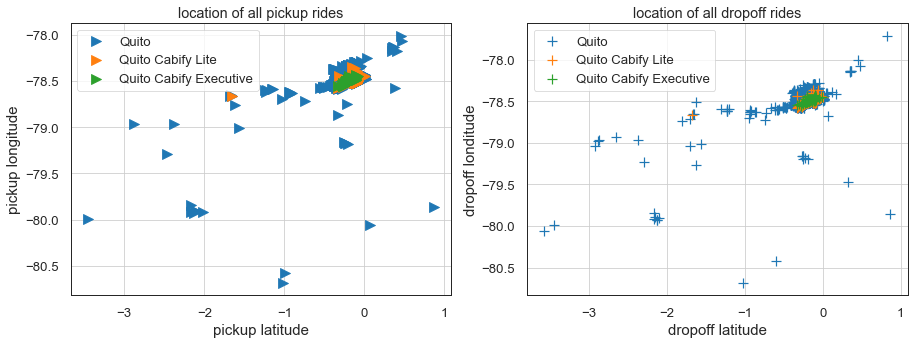

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(uio['pickup_latitude'],uio['pickup_longitude'],s=100,marker='>',label='Quito')
plt.scatter(uio_cl['pickup_latitude'],uio_cl['pickup_longitude'],s=100,marker='>',label='Quito Cabify Lite')
plt.scatter(uio_ce['pickup_latitude'],uio_ce['pickup_longitude'],s=100,marker='>',label='Quito Cabify Executive')
plt.title("location of all pickup rides")
plt.ylabel('pickup longitude')
plt.xlabel('pickup latitude')
plt.grid(True)
plt.legend()


plt.subplot(122)
plt.scatter(uio['dropoff_latitude'],uio['dropoff_longitude'],s=100,label='Quito',marker='+')
plt.scatter(uio_cl['dropoff_latitude'],uio_cl['dropoff_longitude'],s=100,label='Quito Cabify Lite',marker='+')
plt.scatter(uio_ce['dropoff_latitude'],uio_ce['dropoff_longitude'],s=100,label='Quito Cabify Executive',marker='+')
plt.title("location of all dropoff rides")
plt.ylabel('dropoff londitude')
plt.xlabel('dropoff latitude')
plt.grid(True)
plt.legend()

In [93]:
y6=df[df['year']==2016]
y7=df[df['year']==2017]

uio1=y6[y6['vendor_id']=='Quito']
uio_cl1=y6[y6['vendor_id']=='Quito Cabify Lite']
uio_ce1=y6[y6['vendor_id']=='Quito Cabify Executive']

uio2=y7[y7['vendor_id']=='Quito']
uio_cl2=y7[y7['vendor_id']=='Quito Cabify Lite']
uio_ce2=y7[y7['vendor_id']=='Quito Cabify Executive']

In [94]:
print('months in 2016')
y6['month'].unique()

print('months in 2017')
y7['month'].unique()

months in 2016
months in 2017


array([4, 1, 3, 5, 2, 7, 6, 8], dtype=int64)

In [95]:
print('shape of y6',y6.shape)
print('shape of 2017',y7.shape)
print('\n')

print('shape of quito 2016',uio1.shape)
print('shape of quito cabify lie 2016',uio_cl1.shape)
print('shape of quito cabify executive 2016',uio_ce1.shape)
print('\n')
print('shape of quito 2017',uio2.shape)
print('shape of quito cabify lie 2017',uio_cl2.shape)
print('shape of quito cabify executive 2017',uio_ce2.shape)

shape of y6 (14679, 15)
shape of 2017 (17686, 15)


shape of quito 2016 (14646, 15)
shape of quito cabify lie 2016 (27, 15)
shape of quito cabify executive 2016 (6, 15)


shape of quito 2017 (17228, 15)
shape of quito cabify lie 2017 (373, 15)
shape of quito cabify executive 2017 (82, 15)


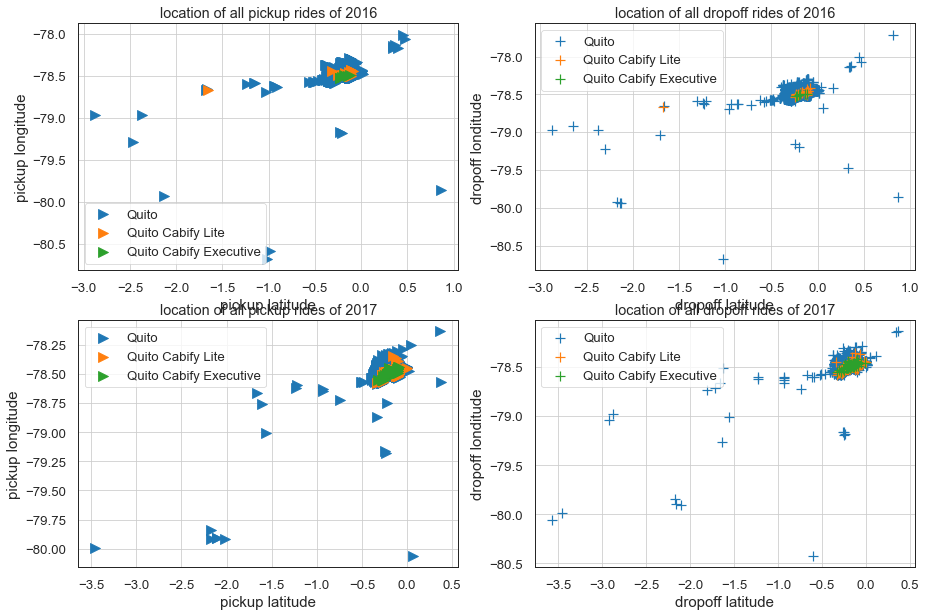

In [96]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.scatter(uio1['pickup_latitude'],uio1['pickup_longitude'],s=100,marker='>',label='Quito')
plt.scatter(uio_cl1['pickup_latitude'],uio_cl1['pickup_longitude'],s=100,marker='>',label='Quito Cabify Lite')
plt.scatter(uio_ce1['pickup_latitude'],uio_ce1['pickup_longitude'],s=100,marker='>',label='Quito Cabify Executive')
plt.title("location of all pickup rides of 2016")
plt.ylabel('pickup longitude')
plt.xlabel('pickup latitude')
plt.grid(True)
plt.legend()


plt.subplot(222)
plt.scatter(uio1['dropoff_latitude'],uio1['dropoff_longitude'],s=100,label='Quito',marker='+')
plt.scatter(uio_cl1['dropoff_latitude'],uio_cl1['dropoff_longitude'],s=100,label='Quito Cabify Lite',marker='+')
plt.scatter(uio_ce1['dropoff_latitude'],uio_ce1['dropoff_longitude'],s=100,label='Quito Cabify Executive',marker='+')
plt.title("location of all dropoff rides of 2016")
plt.ylabel('dropoff londitude')
plt.xlabel('dropoff latitude')
plt.grid(True)
plt.legend()

plt.subplot(223)
plt.scatter(uio2['pickup_latitude'],uio2['pickup_longitude'],s=100,marker='>',label='Quito')
plt.scatter(uio_cl2['pickup_latitude'],uio_cl2['pickup_longitude'],s=100,marker='>',label='Quito Cabify Lite')
plt.scatter(uio_ce2['pickup_latitude'],uio_ce2['pickup_longitude'],s=100,marker='>',label='Quito Cabify Executive')
plt.title("location of all pickup rides of 2017")
plt.ylabel('pickup longitude')
plt.xlabel('pickup latitude')
plt.grid(True)
plt.legend()


plt.subplot(224)
plt.scatter(uio2['dropoff_latitude'],uio2['dropoff_longitude'],s=100,label='Quito',marker='+')
plt.scatter(uio_cl2['dropoff_latitude'],uio_cl2['dropoff_longitude'],s=100,label='Quito Cabify Lite',marker='+')
plt.scatter(uio_ce2['dropoff_latitude'],uio_ce2['dropoff_longitude'],s=100,label='Quito Cabify Executive',marker='+')
plt.title("location of all dropoff rides of 2017")
plt.ylabel('dropoff londitude')
plt.xlabel('dropoff latitude')
plt.grid(True)
plt.legend()

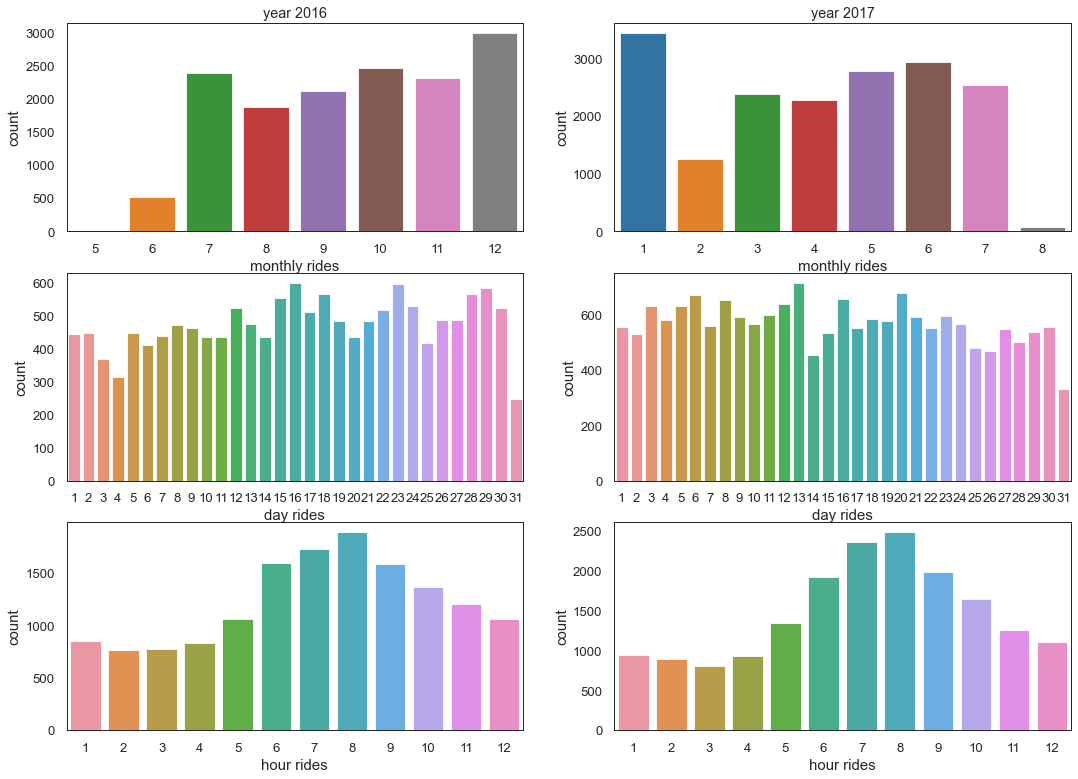

In [97]:
plt.figure(figsize=(18,13))
plt.subplot(321)
sns.countplot(x='month',data=y6)
plt.xlabel("monthly rides")
plt.title("year 2016")

plt.subplot(322)
sns.countplot(x='month',data=y7)
plt.xlabel("monthly rides")
plt.title("year 2017")

plt.subplot(323)
sns.countplot(x='day',data=y6)
plt.xlabel("day rides")

plt.subplot(324)
sns.countplot(x='day',data=y7)
plt.xlabel("day rides")

plt.subplot(325)
sns.countplot(x='hour',data=y6)
plt.xlabel("hour rides")

plt.subplot(326)
sns.countplot(x='hour',data=y7)
plt.xlabel("hour rides")
plt.show()

In [98]:
df=df[df['trip_duration'].between(30,7200)]
df=df[df['wait_sec'].between(0,2400)]
df=df[df['trip_duration'] > df['wait_sec']]
df=df[df['dist_meters'].between(100,10000)]

df=df[(df['pickup_longitude'].between(-78.65,-78.25)) & (df['pickup_latitude'].between(-0.7,0.3))]
df=df[(df['dropoff_longitude'].between(-78.65,-78.25)) & (df['dropoff_latitude'].between(-0.7,0.3))]

df.shape

(23520, 15)

In [99]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec,hour,month,year,day
4,5,Quito,2016-09-18 07:58:42,2016-09-18 08:14:29,-78.521818,-0.208480,-78.504558,-0.222462,948,4625,314,7,9,2016,18
5,6,Quito,2016-08-27 04:19:02,2016-08-27 04:44:12,-78.509202,-0.194839,-78.518764,-0.228794,1510,5820,630,4,8,2016,27
6,7,Quito,2016-09-18 10:08:57,2016-09-18 10:31:18,-78.481542,-0.154317,-78.518420,-0.191547,1341,7593,510,10,9,2016,18
8,9,Quito,2016-09-18 11:54:04,2016-09-18 12:12:23,-78.361079,-0.124644,-78.392735,-0.089407,1100,8150,390,11,9,2016,18
9,10,Quito,2016-09-18 12:21:16,2016-09-18 12:23:05,-78.497122,-0.200376,-78.499757,-0.207293,109,827,29,12,9,2016,18


In [100]:
#header=['id','vendor_id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','dist_meters','wait_sec','hour','month','year','day','trip_duration']

#df=df.reindex(columns=header)

#df.head()

### Splitting the dataset into training set and testing set

In [101]:
x=df.iloc[:,4:]
y=df['trip_duration']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [102]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

## Multiple Linear Algorithm

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [104]:
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [105]:
ypred_ML=regressor.predict(xtest)

In [106]:
result_ML=regressor.score(xtest,ytest)
print('score',result_ML*100)

score 100.0


In [129]:
ypred_ML = pd.Series(ypred_ML)
pd.DataFrame(data = {'predicted value': ypred_ML, 'actual value':list(ytest)})

,predicted value,actual value
0,934.0,934
1,719.0,719
2,250.0,250
3,1425.0,1425
4,180.0,180
...,...,...
4699,611.0,611
4700,485.0,485
4701,424.0,424
4702,432.0,432


## Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
random=RandomForestRegressor(max_depth=2,random_state=0)
random.fit(xtrain,ytrain)
res_RF=random.score(xtest,ytest)
ypred_RF=random.predict(xtest)
print('result',res_RF*100)

result 89.39645244234092


In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA(n_components=3)
xfeatures = pca.fit_transform(xtrain)

In [112]:
ypred_RF = pd.Series(ypred_RF)
pd.DataFrame(data = {'predicted value': ypred_RF, 'actual value':list(ytest)})

,predicted value,actual value
0,1043.687211,934
1,521.322576,719
2,448.911303,250
3,1157.264822,1425
4,448.911303,180
...,...,...
4699,448.911303,611
4700,448.911303,485
4701,448.911303,424
4702,448.911303,432


## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [166]:
dt_regressor=DecisionTreeRegressor(max_depth=15)
dt_regressor.fit(xtrain,ytrain)
ypred_DT=dt_regressor.predict(xtest)
res_DT=dt_regressor.score(xtest,ytest)
print('result:',res_DT*100)

result: 99.9978006499928


In [115]:
ypred_DT = pd.Series(ypred_DT)
pd.DataFrame(data = {'predicted value': ypred_DT, 'actual value':list(ytest)})

,predicted value,actual value
0,934.0,934
1,719.0,719
2,250.0,250
3,1425.0,1425
4,180.0,180
...,...,...
4699,611.0,611
4700,485.0,485
4701,424.0,424
4702,432.0,432


## Support Vector Machine

In [149]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [162]:
svr=SVR(epsilon=1,kernel='poly',degree=3)
svr.fit(xtrain,ytrain)

SVR(epsilon=1, kernel='poly')

In [163]:
ypred_svr=svr.predict(xtest)
result_svr=svr.score(xtest,ytest)
print('result:',result_svr*100)

result: 80.78445955814507


In [164]:
ypred_svr = pd.Series(ypred_svr)
pd.DataFrame(data = {'predicted value': ypred_svr, 'actual value':list(ytest)})

,predicted value,actual value
0,798.787361,934
1,779.396396,719
2,195.779615,250
3,1139.098602,1425
4,421.992863,180
...,...,...
4699,616.805409,611
4700,733.150623,485
4701,682.179126,424
4702,657.828988,432


In [167]:
print('score of Multiple Linear ',result_ML*100)
print('score of Random Forest ',res_RF*100)
print('score of Decision Tree ',res_DT*100)
print('score of Support Vector ',result_svr*100)

score of Multiple Linear  100.0
score of Random Forest  89.39645244234092
score of Decision Tree  99.9978006499928
score of Support Vector  80.78445955814507
